<a href="https://colab.research.google.com/github/AdamayB/00_P.D.F-Projects_Done_for_Fun/blob/main/Mark_XIII_BLSTM_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas numpy seaborn tensorflow matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

,S.NO,Age,Months,Sex,Lab No.,DOA,Fever (P/A),Duration of fever (days),Headache (P/A),Duration of headache,...,Malarial parasites (Done/Not done),Malaria report,ELISA for leptospirosis (Done/Not done),Lepto report,CXR (Done/Not done),Xray report,USG Abdomen (Done/Not done),USG Abd report,Final Diagnosis,AUF Result
0,1,2Y0M28D,24,F,AUF001,19-06-2022,P,3.0,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,D,Normal study,Probable viral illness,Negative
1,2,4Y11M7D,59,M,AUF004,21-06-2022,P,4.0,A,NaN,...,NaN,NaN,NaN,NaN,D,Normal study,D,Mild diffude bladder wall thickening s/o Dysfu...,Probable viral illness,Positive
2,3,44Y,528,F,AUF006,NaN,P,7.0,P,30.0,...,NaN,NaN,NaN,NaN,D,Normal study,D,"Mild hepatosplenomegaly, minimal free fluid in...",NaN,Negative
3,4,41Y,492,M,AUF007,NaN,P,4.0,A,NaN,...,NaN,NaN,NaN,NaN,D,Normal study,NaN,NaN,NaN,Negative
4,5,75Y,900,M,AUF008,NaN,A,NaN,A,NaN,...,NaN,NaN,NaN,NaN,D,Normal study,NaN,NaN,NaN,Inconclusive for Dengue


In [ ]:
data.drop(['S.NO','Age','Lab No.'],axis=1,inplace=True)

In [ ]:
data.head()

,Months,Sex,DOA,Fever (P/A),Duration of fever (days),Headache (P/A),Duration of headache,Myalgia (P/A),Duration of myalgia,Cough (P/A),...,Malarial parasites (Done/Not done),Malaria report,ELISA for leptospirosis (Done/Not done),Lepto report,CXR (Done/Not done),Xray report,USG Abdomen (Done/Not done),USG Abd report,Final Diagnosis,AUF Result
0,24,F,19-06-2022,P,3.0,A,NaN,A,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,D,Normal study,Probable viral illness,Negative
1,59,M,21-06-2022,P,4.0,A,NaN,A,NaN,A,...,NaN,NaN,NaN,NaN,D,Normal study,D,Mild diffude bladder wall thickening s/o Dysfu...,Probable viral illness,Positive
2,528,F,NaN,P,7.0,P,30.0,P,5.0,P,...,NaN,NaN,NaN,NaN,D,Normal study,D,"Mild hepatosplenomegaly, minimal free fluid in...",NaN,Negative
3,492,M,NaN,P,4.0,A,NaN,P,4.0,A,...,NaN,NaN,NaN,NaN,D,Normal study,NaN,NaN,NaN,Negative
4,900,M,NaN,A,NaN,A,NaN,A,NaN,A,...,NaN,NaN,NaN,NaN,D,Normal study,NaN,NaN,NaN,Inconclusive for Dengue


In [ ]:
data.columns


Index(['Months', 'Sex', 'DOA', 'Fever (P/A)', 'Duration of fever (days)',
       'Headache (P/A)', 'Duration of headache', 'Myalgia (P/A)',
       'Duration of myalgia', 'Cough (P/A)', 'Duration of cough',
       'Productive/Non productive (P/NP)', 'Dyspnea (P/A)',
       'Duration of dyspnea', 'Vomiting (P/A)', 'Duration of vomiting',
       'Hematuria (P/A)', 'Duration of hematuria', 'Edema (P/A)',
       'Duration of edema', 'Anorexia (P/A)', 'Nausea (P/A)',
       'Diarrhoea (P/A)', 'Past illness (P/A)', 'Comorbidities',
       'Similar illness in family (P/A)',
       'Any rodent bite/scratch/contact with rodent droppings (Y/N)', 'BP',
       'RR', 'PR', 'Temperature', 'Crepitus/Rhonchi (P/A)', 'Petechiae (P/A)',
       'Additional physical finding', 'Any specific renal sign', 'Total count',
       'Hb/PCV', 'Differential count', 'Platelet count', 'Prothrombin time',
       'SGOT', 'SGPT', 'Bilirubin', 'S. protein (g%)', 'S. albumin (g%)',
       'A/G ratio', 'S. creatinine (mg%)'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 68 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Months                                                             361 non-null    int64  
 1   Sex                                                                361 non-null    object 
 2   DOA                                                                312 non-null    object 
 3   Fever (P/A)                                                        361 non-null    object 
 4   Duration of fever (days)                                           356 non-null    float64
 5   Headache (P/A)                                                     361 non-null    object 
 6   Duration of headache                                               95 non-null     float64
 7   Myalgia (P/A)             

In [ ]:
dNull={}
for i in data.columns:
  dNull[i]=data[i].isna().sum()

In [ ]:
dNull

{'Months': 0,
 'Sex': 0,
 'DOA': 49,
 'Fever (P/A)': 0,
 'Duration of fever (days)': 5,
 'Headache (P/A)': 0,
 'Duration of headache': 266,
 'Myalgia (P/A)': 0,
 'Duration of myalgia': 250,
 'Cough (P/A)': 0,
 'Duration of cough': 251,
 'Productive/Non productive (P/NP)': 234,
 'Dyspnea (P/A)': 1,
 'Duration of dyspnea': 324,
 'Vomiting (P/A)': 1,
 'Duration of vomiting': 190,
 'Hematuria (P/A)': 1,
 'Duration of hematuria': 351,
 'Edema (P/A)': 0,
 'Duration of edema': 345,
 'Anorexia (P/A)': 0,
 'Nausea (P/A)': 0,
 'Diarrhoea (P/A)': 1,
 'Past illness (P/A)': 6,
 'Comorbidities': 1,
 'Similar illness in family (P/A)': 1,
 'Any rodent bite/scratch/contact with rodent droppings (Y/N)': 2,
 'BP': 3,
 'RR': 2,
 'PR': 2,
 'Temperature': 1,
 'Crepitus/Rhonchi (P/A)': 0,
 'Petechiae (P/A)': 0,
 'Additional physical finding': 0,
 'Any specific renal sign': 1,
 'Total count': 127,
 'Hb/PCV': 27,
 'Differential count': 127,
 'Platelet count': 3,
 'Prothrombin time': 265,
 'SGOT': 20,
 'SGPT': 

In [ ]:
for i in dNull.keys():
  if dNull[i]>200:
    print(i,dNull[i])

Duration of headache 266
Duration of myalgia 250
Duration of cough 251
Productive/Non productive (P/NP) 234
Duration of dyspnea 324
Duration of hematuria 351
Duration of edema 345
Prothrombin time 265
A/G ratio 217
Urine protein (mg) 214
Urine output (24 hr) (ml/Kg/Hr) 295
Other Investigations if any 289
Typhidot / Widal (Done/Not done) 299
Typhi dot/ WIDAL Report 299
Weil Felix/Scrub typhus IgM (Done/Not done) 282
Scrub typhus Report 282
Malarial parasites (Done/Not done) 310
Malaria report 311
ELISA for leptospirosis (Done/Not done) 284
Lepto report 267
USG Abdomen (Done/Not done) 260
USG Abd report 260


### SEX ENCODING

In [ ]:
print(data['Sex'].value_counts())
print('================================================')

Sex
M    204
F    157
Name: count, dtype: int64


In [ ]:
le=LabelEncoder()

In [ ]:
data['Sex']=le.fit_transform(data['Sex'])

In [ ]:
data['Sex'].value_counts()

Sex
1    204
0    157
Name: count, dtype: int64

### DOA Encoding

In [ ]:
data['DOA'].value_counts()

DOA
05-01-2023    12
09-01-2023     8
02-01-2023     8
16-01-2023     5
17-01-2023     5
              ..
18-08-2022     1
24-10-2022     1
22-10-2022     1
21-10-2022     1
09-12-23       1
Name: count, Length: 180, dtype: int64

In [ ]:
data['DOA'].isna().sum()

49

In [ ]:
data['DOA']=data['DOA'].fillna('0')

In [ ]:
def doa(column):
    pa=column
    if pa!='0':
        if '-' in pa:
            l=pa.split('-')
            if len(l[2])==4:
                l[2]=l[2][2::]
                return int(''.join(l))
            else:
                return int(''.join(l))
        if '.' in pa:
            l=pa.split('.')
            if len(l[2])==4:
                l[2]=l[2][2::]
                return int(''.join(l))
            else:
                return int(''.join(l))
    else:
        return 0

In [ ]:
data['DOA']=data['DOA'].apply(doa)

In [ ]:
data['DOA'].isna().sum()

0

In [ ]:
data['DOA'][0]

190622

### Handling P/A values

In [ ]:
pacolumns=['Fever (P/A)','Headache (P/A)','Myalgia (P/A)','Cough (P/A)','Dyspnea (P/A)','Vomiting (P/A)','Hematuria (P/A)','Edema (P/A)','Anorexia (P/A)','Nausea (P/A)','Diarrhoea (P/A)','Crepitus/Rhonchi (P/A)','Petechiae (P/A)']

In [ ]:
for i in pacolumns:
    print(data[i].value_counts())
    print('=================')

Fever (P/A)
P    328
p     27
A      6
Name: count, dtype: int64
Headache (P/A)
A    261
P     95
p      4
5      1
Name: count, dtype: int64
Myalgia (P/A)
A    245
P    113
p      3
Name: count, dtype: int64
Cough (P/A)
A    248
P    111
p      2
Name: count, dtype: int64
Dyspnea (P/A)
A    318
P     40
p      2
Name: count, dtype: int64
Vomiting (P/A)
A    184
P    175
p      1
Name: count, dtype: int64
Hematuria (P/A)
A    346
P     13
p      1
Name: count, dtype: int64
Edema (P/A)
A    339
P     22
Name: count, dtype: int64
Anorexia (P/A)
A    232
P    126
-      2
p      1
Name: count, dtype: int64
Nausea (P/A)
A    312
P     49
Name: count, dtype: int64
Diarrhoea (P/A)
A    300
P     60
Name: count, dtype: int64
Crepitus/Rhonchi (P/A)
A                             321
P                              37
p                               1
Bilateral scattered wheeze      1
Occasional crepts+              1
Name: count, dtype: int64
Petechiae (P/A)
A                              348
P 

In [ ]:
def paencode(column):
    pa=str(column)[0]
    if pa.lower()=='a':
        return 0
    else:
        return 1

In [ ]:
for i in pacolumns:
    data[i]=data[i].apply(paencode)

In [ ]:
data['Fever (P/A)'].value_counts()

Fever (P/A)
1    355
0      6
Name: count, dtype: int64

In [ ]:
for i in pacolumns:
    print(data[i].value_counts())
    print('=================')

Fever (P/A)
1    355
0      6
Name: count, dtype: int64
Headache (P/A)
0    261
1    100
Name: count, dtype: int64
Myalgia (P/A)
0    245
1    116
Name: count, dtype: int64
Cough (P/A)
0    248
1    113
Name: count, dtype: int64
Dyspnea (P/A)
0    318
1     43
Name: count, dtype: int64
Vomiting (P/A)
0    184
1    177
Name: count, dtype: int64
Hematuria (P/A)
0    346
1     15
Name: count, dtype: int64
Edema (P/A)
0    339
1     22
Name: count, dtype: int64
Anorexia (P/A)
0    232
1    129
Name: count, dtype: int64
Nausea (P/A)
0    312
1     49
Name: count, dtype: int64
Diarrhoea (P/A)
0    300
1     61
Name: count, dtype: int64
Crepitus/Rhonchi (P/A)
0    321
1     40
Name: count, dtype: int64
Petechiae (P/A)
0    348
1     13
Name: count, dtype: int64


### Handling Duration columns

In [ ]:
durationcolumns=['Duration of fever (days)','Duration of headache','Duration of myalgia','Duration of cough','Duration of dyspnea','Duration of vomiting','Duration of hematuria','Duration of edema']

In [ ]:
for i in durationcolumns:
    print(data[i].value_counts())
    print('Null values:')
    print(data[i].isna().sum())
    print('=================')

Duration of fever (days)
5.0     80
3.0     65
4.0     51
7.0     39
2.0     36
6.0     27
1.0     16
8.0     14
10.0     9
12.0     4
9.0      3
15.0     3
13.0     2
14.0     2
0.0      2
11.0     1
20.0     1
30.0     1
Name: count, dtype: int64
Null values:
5
Duration of headache
5.0     21
2.0     18
4.0     15
3.0     14
1.0     14
7.0      8
6.0      3
30.0     1
9.0      1
Name: count, dtype: int64
Null values:
266
Duration of myalgia
5.0     24
2.0     24
3.0     18
4.0     17
1.0     15
7.0     10
6.0      2
10.0     1
Name: count, dtype: int64
Null values:
250
Duration of cough
3.0     24
4.0     19
2.0     18
5.0     16
7.0     12
1.0      7
6.0      4
14.0     3
10.0     3
15.0     2
20.0     1
30.0     1
Name: count, dtype: int64
Null values:
251
Duration of dyspnea
1.0    11
3.0     9
2.0     7
5.0     5
4.0     4
7.0     1
Name: count, dtype: int64
Null values:
324
Duration of vomiting
1.0     60
2.0     56
3.0     20
4.0     15
5.0      8
7.0      4
6.0      4
8.0     

In [ ]:
for i in durationcolumns:
    data[i].fillna(data[i].median(),inplace=True)

In [ ]:
for i in durationcolumns:
    print(data[i].isna().sum())
    print('=================')

0
0
0
0
0
0
0
0


In [ ]:
def cleaning(column):
    p=column
    if type(p)!=float and p.isalpha():
        return None
    else:
        return float(p)

In [ ]:
data['Bilirubin']=data['Bilirubin'].apply(cleaning)

In [ ]:
data['Bilirubin'].fillna(data['Bilirubin'].median(),inplace=True)

In [ ]:
data['Bilirubin']

0      0.59
1      0.59
2      3.19
3      2.43
4      1.97
       ... 
356    0.59
357    0.50
358    0.59
359    0.59
360    0.59
Name: Bilirubin, Length: 361, dtype: float64

In [ ]:
data['Bilirubin'].isna().sum()

0

In [ ]:
data['S. protein (g%)']=data['S. protein (g%)'].apply(cleaning)

In [ ]:
data['S. protein (g%)'].fillna(data['S. protein (g%)'].median(),inplace=True)

In [ ]:
data['S. protein (g%)'].isna().sum()

0

In [ ]:
data['S. albumin (g%)']

0       NaN
1       NaN
2       2.3
3      3.23
4      2.32
       ... 
356     NaN
357     2.6
358     NaN
359     NaN
360     NaN
Name: S. albumin (g%), Length: 361, dtype: object

In [ ]:
data['S. albumin (g%)']=data['S. albumin (g%)'].apply(cleaning)

In [ ]:
data['S. albumin (g%)'].fillna(data['S. albumin (g%)'].median(),inplace=True)

In [ ]:
data['S. albumin (g%)'].isna().sum()

0

### Done/Not Done Columns

In [ ]:
dnacolumns=['Malarial parasites (Done/Not done)','ELISA for leptospirosis (Done/Not done)','CXR (Done/Not done)','USG Abdomen (Done/Not done)']

In [ ]:
for i in dnacolumns:
    print(data[i].value_counts())
    print('Null values:')
    print(data[i].isna().sum())
    print('=================')

Malarial parasites (Done/Not done)
D           50
NEGATIVE     1
Name: count, dtype: int64
Null values:
310
ELISA for leptospirosis (Done/Not done)
D           75
NEGATIVE     2
Name: count, dtype: int64
Null values:
284
CXR (Done/Not done)
D    173
Name: count, dtype: int64
Null values:
188
USG Abdomen (Done/Not done)
D    101
Name: count, dtype: int64
Null values:
260


In [ ]:
def dnaclean(column):
    dna=column
    if dna!='0':
        return 1
    else:
        return 0

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Done/NA )'].fillna('0',inplace=True)

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Done/NA )'].value_counts()

Dengue Viral Immunoassay (IgM) (Done/NA )
D                                           167
0                                           150
Dengue IGM Positive                           9
Positive                                      7
not done                                      3
Negative                                      2
Dengue IGM positive                           2
Dengue RNA PCR Positive                       2
Dengue Ns1 positive                           2
NEGATIVE                                      1
Dengue NS1 IGG positive                       1
Dengue NS1AG positive                         1
Dengue Ns1AG + IGM positive                   1
Dengue Ns1 AG positive                        1
Dengue Ns1 Positive                           1
Dengue Ns1Positive                            1
Dengue IGG positive                           1
Dengue Ns1 aNA IGM positive                   1
Dengue NS1ag IGM positive                     1
Dengue Ns1 AG aNA IGM positive                

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Done/NA )']=data['Dengue Viral Immunoassay (IgM) (Done/NA )'].apply(dnaclean)

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Done/NA )'].isna().sum()

0

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Done/NA )'].value_counts()

Dengue Viral Immunoassay (IgM) (Done/NA )
1    211
0    150
Name: count, dtype: int64

In [ ]:
data['Typhidot / Widal (Done/Not done)'].fillna('0',inplace=True)

In [ ]:
data['Typhidot / Widal (Done/Not done)'].value_counts()

Typhidot / Widal (Done/Not done)
0           299
D            61
D(WIDAL)      1
Name: count, dtype: int64

In [ ]:
data['Typhidot / Widal (Done/Not done)']=data['Typhidot / Widal (Done/Not done)'].apply(dnaclean)

In [ ]:
data['Typhidot / Widal (Done/Not done)'].isna().sum()

0

In [ ]:
data['Typhidot / Widal (Done/Not done)'].value_counts()

Typhidot / Widal (Done/Not done)
0    299
1     62
Name: count, dtype: int64

In [ ]:
data['Weil Felix/Scrub typhus IgM (Done/Not done)'].fillna('0',inplace=True)

In [ ]:
data['Weil Felix/Scrub typhus IgM (Done/Not done)'].value_counts()

Weil Felix/Scrub typhus IgM (Done/Not done)
0    282
D     79
Name: count, dtype: int64

In [ ]:
data['Weil Felix/Scrub typhus IgM (Done/Not done)']=data['Weil Felix/Scrub typhus IgM (Done/Not done)'].apply(dnaclean)

In [ ]:
data['Weil Felix/Scrub typhus IgM (Done/Not done)'].isna().sum()

0

In [ ]:
data['Weil Felix/Scrub typhus IgM (Done/Not done)'].value_counts()

Weil Felix/Scrub typhus IgM (Done/Not done)
0    282
1     79
Name: count, dtype: int64

In [ ]:
for i in dnacolumns:
    data[i].fillna('0',inplace=True)
    data[i]=data[i].apply(dnaclean)

In [ ]:
for i in dnacolumns:
    print(data[i].isna().sum())
    print(data[i].value_counts())
    print("=============================")

0
Malarial parasites (Done/Not done)
0    310
1     51
Name: count, dtype: int64
0
ELISA for leptospirosis (Done/Not done)
0    284
1     77
Name: count, dtype: int64
0
CXR (Done/Not done)
0    188
1    173
Name: count, dtype: int64
0
USG Abdomen (Done/Not done)
0    260
1    101
Name: count, dtype: int64


### String Encoding Function

In [ ]:
int(bin(ord('a')+ord('A')),2)

162

In [ ]:
def strencode(column):
    pa=column
    ans=0

    for i in pa:
        ans+=ord(i)
    return ans
#     pa_encode=pa.encode('utf_16','strict')
#     integer = int.from_bytes(pa_encode, byteorder='little')

    #return integer//len(pa_encode)

In [ ]:
def strencodegeneral(stri):
    ans=0
    for i in stri:
        ans+=ord(i)
    return ans

str="Hello! Welcome to Tutorialspoint."
str_encoded= str.encode('utf_16','strict')
print("The encoded string is: ", str_encoded)

bytes = str_encoded
integer = int.from_bytes(bytes, byteorder='little')
print(integer)

In [ ]:
def comoor(column):
  co=column
  if co!='A':
    return 'P'
  else:
    return 'A'

In [ ]:
data['Comorbidities'].value_counts()

Comorbidities
A                                                                                                                                 236
DM,HT                                                                                                                              45
DM                                                                                                                                 17
NIL                                                                                                                                11
HT                                                                                                                                  8
DM ,                                                                                                                                2
CHD                                                                                                                                 2
Bronchial asuthuma                              

In [ ]:
data['Comorbidities']=data['Comorbidities'].apply(comoor)

In [ ]:
data['Comorbidities']=le.fit_transform(data['Comorbidities'])

### Additional physical findings

In [ ]:
data['Additional physical finding'].value_counts()

Additional physical finding
A                                                                      144
Lethargic                                                               10
Sick looking                                                             7
Mild hepatomegaly                                                        6
Right hypochondriac tenderness                                           4
                                                                      ... 
Hepatomegaly, Respiratory distress and compensated shock                 1
Sick kooing, bilateral enralrged tonsils with mild facial puffiness      1
Sick looking, flushed with mild hepatomegaly                             1
Dull looking, PSM Murmer                                                 1
Tenderness in right hypocondrial region                                  1
Name: count, Length: 180, dtype: int64

In [ ]:
data['Additional physical finding']=data['Additional physical finding'].apply(comoor)

In [ ]:
data['Additional physical finding']=le.fit_transform(data['Additional physical finding'])

In [ ]:
def renal(column):
    r=column
    if r=='A' and r=='NIL':
        return 'A'
    else:
        return 'P'

In [ ]:
data['Any specific renal sign'].value_counts()

Any specific renal sign
A                                                                                                                          351
Pedal edema                                                                                                                  3
edema                                                                                                                        2
NIL                                                                                                                          2
Had Acute kidney injury stage 3 with anuria, fluid overload and persistent metabolic acidosis and was commenced on CRRT      1
AKI                                                                                                                          1
Name: count, dtype: int64

In [ ]:
data['Any specific renal sign'].isna().sum()

1

### Function to fill NA values in string datatype columns

In [ ]:
data['Any specific renal sign']=data['Any specific renal sign'].fillna('-')

In [ ]:
data['Any specific renal sign']=data['Any specific renal sign'].apply(renal)

In [ ]:
data['Any specific renal sign']=le.fit_transform(data['Any specific renal sign'])

In [ ]:
data['Any specific renal sign'].value_counts()

Any specific renal sign
0    361
Name: count, dtype: int64

### Differential count

In [ ]:
data['Differential count'].value_counts()

Differential count
N60L38M2      6
N36L60M4      5
N60L37M3      3
N69L28M3      3
N63L35M2      3
             ..
N75L24M1      1
N45L49M6      1
N93L7         1
N55L42M1E2    1
N44L50M05     1
Name: count, Length: 191, dtype: int64

In [ ]:
data['Differential count'].isna().sum()

127

In [ ]:
data['Differential count']=data['Differential count'].fillna('0')

In [ ]:
data['Differential count'].isna().sum()

0

In [ ]:
data['Differential count']=data['Differential count'].apply(strencode)

In [ ]:
data['Differential count'].value_counts()

Differential count
48     127
490    117
607     29
538     24
499     18
703      5
365      4
616      4
442      3
547      3
361      2
485      2
493      2
570      2
65       2
451      1
657      1
356      1
541      1
608      1
532      1
568      1
434      1
559      1
360      1
317      1
363      1
489      1
355      1
370      1
712      1
537      1
Name: count, dtype: int64

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Positive/Negative)']

0                      Negative
1                           NaN
2                           NaN
3                           NaN
4                           NaN
                 ...           
356    Dengue Ns1 +IGM Positive
357       Dengue Ns1AG positive
358     Dengue NS1 IGG Positive
359                    Negative
360         Dengue Ns1 Positive
Name: Dengue Viral Immunoassay (IgM) (Positive/Negative), Length: 361, dtype: object

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Positive/Negative)'].value_counts()

Dengue Viral Immunoassay (IgM) (Positive/Negative)
Negative                                       57
NS1 and IgM Negative                           17
NS1 and IgM Positive                           16
NS1 Positive and IgM Negative                  12
Positive                                       10
Dengue IGM Positive                             8
NS1 Negative IgM Positive                       8
NS1 Positive IgM Negative                       6
D                                               6
IGM Positive                                    5
NS1 and IgM Negative, IgG Positive              4
NS1, IgM and IgG Positive                       3
Dengue NS1 positive                             3
NS1 Negative                                    3
NS1 Negative and IgM Positive                   3
NS1 and IgM Negative; IgG Positive              3
-                                               3
NS1 Positive                                    3
NS1 and IgM Negative IgG Positive               2

In [ ]:
#IgM,NS1,IgG Possitive=2, negative=1, Not done=3
d={'Negative':133,'NEGATIVE':133,
'NS1 and IgM Negative':113,
'NS1 and IgM Positive':223,
'NS1 Positive and IgM Negative':213,
'Positive':233,
'Dengue IGM Positive':233,
'NS1 Negative IgM Positive':213,
'NS1 Positive IgM Negative':213,
'D':333,
'IGM Positive':233,
'NS1 and IgM Negative, IgG Positive':112,
'NS1, IgM and IgG Positive':222,
'Dengue NS1 positive':323,
'NS1 Negative':313,
'NS1 Negative and IgM Positive':213,
'NS1 and IgM Negative; IgG Positive':112,
'-':333,
'NS1 Positive':323,
'NS1 and IgM Negative IgG Positive':112,
'NS1 Positive and Igm Negative':123,
'Dengue Ns1AG positive':323,
'Dengue RNA PCR Positive':4,
'POSITIVE':233,
'NS1 Positive, IgM Negative':123,
'NS1 Positive, IgM Negative and IgG Positive':122,
'NS1 Positive, IgM Negative, IgG Positive':122,
'NS1 Negative, IgM Positive':213,
'NS1 Negative, IgM Positive and IgG Negative':211,
'Not done':-1,
'Dengue NS1 IGG Positive':122,
'Dengue Ns1 +IGM Positive':223,
'Dengue IGM positive':233,
'NS1 Positive, Igm and IgG Negative':121,
'Igm Negative IgG Positive':132,
'NS1 Negative Igm Positive':213,
'IGG Positive':332,
'NS1 Negative, IgM and IgG Positive':212,
'NS1 Negative IgM Positive and IgG Positive':212,
'Dengue RNA PCR positive':233,
'NS1 positive IgM Negative':123,
'Dengue PCR Positive':233,
'NS1 is Negative, IgM Positive':213,
'NS1 and Igm Negative':113,
'Positive':233,
'NS1 and IgM Negative, IgG positive':112,
'Dengue Ns1 Positive':323}

In [ ]:
def igm(column):
    ig=column
    if ig in d.keys():
        return d[ig]
    else:
        return -1

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Positive/Negative)']=data['Dengue Viral Immunoassay (IgM) (Positive/Negative)'].apply(igm)

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Positive/Negative)'].isna().sum()

0

In [ ]:
def posneg(column):
    pn=column
    if pn in ['Positive','O (1 in 160) and H (1 in 640) Positive','O & H Positive','Positive (3.50)','D']:
        return 2
    elif pn in ['Negative','All Negative','NEGATIVE',]:
        return 1
    else:
        return 0

In [ ]:
data['Typhi dot/ WIDAL Report'].value_counts()

Typhi dot/ WIDAL Report
Negative                                  53
Positive                                   3
All Negative                               2
NEGATIVE                                   2
O (1 in 160) and H (1 in 640) Positive     1
O & H Positive                             1
Name: count, dtype: int64

In [ ]:
data['Typhi dot/ WIDAL Report'].isna().sum()

299

In [ ]:
data['Typhi dot/ WIDAL Report']=data['Typhi dot/ WIDAL Report'].apply(posneg)

In [ ]:
data['Typhi dot/ WIDAL Report'].value_counts()

Typhi dot/ WIDAL Report
0    299
1     57
2      5
Name: count, dtype: int64

In [ ]:
data['Scrub typhus Report'].value_counts()

Scrub typhus Report
Negative           65
Positive           12
Positive (3.50)     1
NEGATIVE            1
Name: count, dtype: int64

In [ ]:
data['Scrub typhus Report'].isna().sum()

282

In [ ]:
data['Scrub typhus Report']=data['Scrub typhus Report'].apply(posneg)

In [ ]:
data['Scrub typhus Report'].isna().sum()

0

In [ ]:
data['Malaria report'].value_counts()

Malaria report
Negative    44
NEGATIVE     3
NOT SEEN     2
D            1
Name: count, dtype: int64

In [ ]:
data['Malaria report'].isna().sum()

311

In [ ]:
data['Malaria report']=data['Malaria report'].apply(posneg)

In [ ]:
data['Malaria report'].isna().sum()

0

In [ ]:
data['Malaria report'].value_counts()

Malaria report
0    313
1     47
2      1
Name: count, dtype: int64

In [ ]:
data['Lepto report'].value_counts()

Lepto report
Negative    60
D           19
Positive    10
NEGATIVE     5
Name: count, dtype: int64

In [ ]:
data['Lepto report']=data['Lepto report'].apply(posneg)

In [ ]:
data['Lepto report'].isna().sum()

0

In [ ]:
data['Lepto report'].value_counts()

Lepto report
0    267
1     65
2     29
Name: count, dtype: int64

In [ ]:
data['Xray report'].value_counts()

Xray report
Normal study                                                                                                                       47
Normal                                                                                                                             41
NORMAL                                                                                                                             15
BVM with infiltrates                                                                                                               11
B/L Infiltrates                                                                                                                     4
UNREMARKABLE                                                                                                                        3
-                                                                                                                                   3
Bvm with infiltrates                              

In [ ]:
def xray(column):
    x=column
    if x in ['Normal study','Normal','NORMAL','UNREMARKABLE','Unremarkable','UNREMARABLE']:
        return 0
    elif x=='-':
        return -1
    elif type(x)==float:
        return -1
    else:
        return strencodegeneral(x)

In [ ]:
data['Xray report']=data['Xray report'].apply(xray)

In [ ]:
data['Xray report'].value_counts()

Xray report
-1        189
 0        109
 1926      11
 1378       4
 1990       3
 1620       2
 1602       2
 9484       2
 2194       2
 5019       1
 6688       1
 3654       1
 8379       1
 7157       1
 3492       1
 8126       1
 1838       1
 2657       1
 2304       1
 1987       1
 1523       1
 1569       1
 993        1
 2085       1
 2596       1
 5578       1
 3050       1
 5991       1
 1787       1
 3473       1
 3446       1
 2951       1
 5836       1
 12037      1
 1812       1
 4153       1
 2405       1
 4558       1
 5404       1
 3239       1
 3460       1
 5964       1
 5692       1
 3927       1
 2747       1
 3437       1
Name: count, dtype: int64

In [ ]:
data['Xray report'].isna().sum()

0

## Columns with no common functions

### Productive/Non-Productive

In [ ]:
data['Productive/Non productive (P/NP)'].value_counts()

Productive/Non productive (P/NP)
N/P    112
P        8
-        6
A        1
Name: count, dtype: int64

In [ ]:
data['Productive/Non productive (P/NP)'].isna().sum()

234

In [ ]:
data['Productive/Non productive (P/NP)'].fillna('-',inplace=True)

In [ ]:
data['Productive/Non productive (P/NP)']=le.fit_transform(data['Productive/Non productive (P/NP)'])

In [ ]:
data['Productive/Non productive (P/NP)'].value_counts()

Productive/Non productive (P/NP)
0    240
2    112
3      8
1      1
Name: count, dtype: int64

### Past Illness

In [ ]:
data['Past illness (P/A)'].value_counts()

Past illness (P/A)
NIL                                                                                                                                                                                                                 285
Nil                                                                                                                                                                                                                   8
P                                                                                                                                                                                                                     4
CHD                                                                                                                                                                                                                   2
DM.HT CHD                                                                                                            

In [ ]:
data['Past illness (P/A)'].fillna('-1',inplace=True)

In [ ]:
def pastillnesscolumn(column):
    pi=column
    if pi=='Nil' or pi=='NIL':
        return 1
    elif pi=='-1':
        return 0
    else:
        return 2


In [ ]:
data['Past illness (P/A)']=data['Past illness (P/A)'].apply(pastillnesscolumn)

### Similar Illness

In [ ]:
data['Similar illness in family (P/A)'].value_counts()

Similar illness in family (P/A)
NO                                199
No                                139
B/L RENAL CALCULAI                  2
NP                                  2
CHD                                 2
Yes (Mother)                        2
COPD                                1
H/o of Atopy in mother              1
CHD,DM                              1
Hypothyroidism                      1
SON                                 1
Oliguria                            1
CAD                                 1
Valvular heart disease              1
YES                                 1
P                                   1
Yes (elder sibling)                 1
Sibling with fever 1 week back      1
A                                   1
CAP                                 1
Name: count, dtype: int64

In [ ]:
data['Similar illness in family (P/A)'].isna().sum()

1

In [ ]:
data['Similar illness in family (P/A)'].fillna('-1',inplace=True)

In [ ]:
data['Similar illness in family (P/A)'].isna().sum()

0

In [ ]:
def pnaillness(column):
    pna=column
    if pna in ['NO','No','A']:
        return 'A'
    elif pna=='-1':
        return 'NA'
    else:
        return 'P'

In [ ]:
data['Similar illness in family (P/A)']=le.fit_transform(data['Similar illness in family (P/A)'])

### Rodent bites/scratches/contact with droppings

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'].value_counts()

Any rodent bite/scratch/contact with rodent droppings (Y/N)
A                                 354
-                                   3
H/O contact with tick and mite      1
Yes                                 1
Name: count, dtype: int64

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'].isna().sum()

2

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'].fillna('-',inplace=True)

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'].isna().sum()

0

In [ ]:
def rodent(column):
    ro=column
    if ro=='A':
        return 'N'
    elif ro=='-':
        return 'NA'
    else:
        return 'Y'

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)']=data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'].apply(rodent)

In [ ]:
data['Any rodent bite/scratch/contact with rodent droppings (Y/N)']=le.fit_transform(data['Any rodent bite/scratch/contact with rodent droppings (Y/N)'])

### Prothrombin time

In [ ]:
data['Prothrombin time']

0            NaN
1            NaN
2            NaN
3      Prolonged
4      Prolonged
         ...    
356          NaN
357          NaN
358          NaN
359          NaN
360          NaN
Name: Prothrombin time, Length: 361, dtype: object

In [ ]:
data['Prothrombin time'].value_counts()

Prothrombin time
Prolonged    60
Normal       31
Less          4
-             1
Name: count, dtype: int64

In [ ]:
data['Prothrombin time'].isna().sum()

265

In [ ]:
data['Prothrombin time'].fillna('-',inplace=True)

In [ ]:
def pt(column):
    p=column
    if p=='Normal':
        return 1
    elif p=='Less':
        return 0
    elif p=='Prolonged':
        return 2
    else:
        return None

In [ ]:
data['Prothrombin time']=le.fit_transform(data['Prothrombin time'])

In [ ]:
# data['Prothrombin time'].fillna(-1,inplace=True)

In [ ]:
data['Prothrombin time'].isna().sum()

0

### Urine protein (mg)

In [ ]:
data['Urine protein (mg)'].value_counts()

Urine protein (mg)
Negative       76
Trace          26
2              14
1              12
Positive        4
3               4
D               2
NP              1
NANA            1
7.43            1
Not Present     1
6.55            1
15              1
7.4             1
5.6             1
4.6             1
Name: count, dtype: int64

In [ ]:
data['Urine protein (mg)'].isna().sum()

214

In [ ]:
data['Urine protein (mg)'].fillna('-',inplace=True)

In [ ]:
def urinepr(column):
    u=column
    if u in ['Negative','Not Present','NP']:
        return 0
    elif u=='NANA' or u=='-':
        return -1
    elif type(u)!=float:
        return 1

In [ ]:
data['Urine protein (mg)']=data['Urine protein (mg)'].apply(urinepr)

In [ ]:
data['Urine protein (mg)'].value_counts()

Urine protein (mg)
-1    215
 0     78
 1     68
Name: count, dtype: int64

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].value_counts()

Urine output (24 hr) (ml/Kg/Hr)
Normal       21
Adequete     20
Decreased    12
Increased     9
oliguriya     1
Anuria        1
Adquete       1
oliguria      1
Name: count, dtype: int64

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].isna().sum()

295

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].fillna('-1',inplace=True)

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].isna().sum()

0

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].value_counts()

Urine output (24 hr) (ml/Kg/Hr)
-1           295
Normal        21
Adequete      20
Decreased     12
Increased      9
oliguriya      1
Anuria         1
Adquete        1
oliguria       1
Name: count, dtype: int64

In [ ]:
def urout(column):
    ur=column
    if ur in ['Normal','Adequete','Adquete']:
        return 'Normal'
    elif ur in ['Decreased','oliguriya','oliguria']:
        return 'Decreased'
    elif ur in ['Increased']:
        return 'Increased'
    elif ur=='Anuria':
        return 'Anuria'
    else:
        return 'Not Done'

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)']=data['Urine output (24 hr) (ml/Kg/Hr)'].apply(urout)

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].value_counts()

Urine output (24 hr) (ml/Kg/Hr)
Not Done     295
Normal        42
Decreased     14
Increased      9
Anuria         1
Name: count, dtype: int64

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)']=le.fit_transform(data['Urine output (24 hr) (ml/Kg/Hr)'])

In [ ]:
data['Urine output (24 hr) (ml/Kg/Hr)'].value_counts()

Urine output (24 hr) (ml/Kg/Hr)
4    295
3     42
1     14
2      9
0      1
Name: count, dtype: int64

In [ ]:
data['Other Investigations if any'].value_counts()

Other Investigations if any
Urine culture NG                                                                                                                                                                                                                                                                                                           20
Outside done Dengue NS1 Positive                                                                                                                                                                                                                                                                                            3
Urine culture- NG                                                                                                                                                                                                                                                                                                           3
Acetaminophen leve

In [ ]:
data['Other Investigations if any'].isna().sum()

289

In [ ]:
data['Other Investigations if any'].fillna('0',inplace=True)

In [ ]:
data['Other Investigations if any']=le.fit_transform(data['Other Investigations if any'])

In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )'].value_counts()

Bacterial culture & sensitivity (Positive / Negative / not done )
D           178
P            25
Positive      4
N             1
positive      1
Name: count, dtype: int64

In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )'].isna().sum()

152

In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )'].fillna('ND',inplace=True)

In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )'].value_counts()

Bacterial culture & sensitivity (Positive / Negative / not done )
D           178
ND          152
P            25
Positive      4
N             1
positive      1
Name: count, dtype: int64

In [ ]:
def bact(column):
    ba=column
    if ba=='D':
        return 1
    if ba=='ND':
        return 0
    if ba in ['positive','P','Positive']:
        return 2
    if ba=='N':
        return 3



In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )'].isna().sum()

0

In [ ]:
data['Bacterial culture & sensitivity (Positive / Negative / not done )']=data['Bacterial culture & sensitivity (Positive / Negative / not done )'].apply(bact)

In [ ]:
data['If positive, Organism']

0      NO GROWTH
1      NO GROWTH
2            NaN
3            NaN
4            NaN
         ...    
356          NaN
357          NaN
358    NO GROWTH
359    NO GROWTH
360          NaN
Name: If positive, Organism, Length: 361, dtype: object

In [ ]:
data['If positive, Organism'].value_counts()

If positive, Organism
NO GROWTH                   160
Salmonella Typhi             22
Salmonella Paratyphi A        7
Salmonella typhi              6
-NA                           3
Klebsiella                    3
EColi                         2
Negative                      2
Pseudomonas Stutgeri          1
-                             1
Streptococcus pneumoniae      1
MDR E.coli                    1
STREPTOCOCCUS                 1
ECOLI                         1
Name: count, dtype: int64

In [ ]:
data['If positive, Organism'].isna().sum()

150

In [ ]:
def orgenc(column):
    org=column
    if org=='NO GROWTH':
        return 0
    elif type(org)!=float and (org!='-NA' or org!='-'):
        return strencodegeneral(org)
    else:
        return 1

In [ ]:
data['If positive, Organism']=data['If positive, Organism'].apply(orgenc)

In [ ]:
data['If positive, Organism'].isna().sum()

0

In [ ]:
data['If positive, Organism'].value_counts()

If positive, Organism
0       160
1       150
1590     22
2107      7
1622      6
188       3
1016      3
460       2
819       2
2053      1
45        1
2498      1
797       1
1009      1
364       1
Name: count, dtype: int64

In [ ]:
data['Dengue Viral Immunoassay (IgM) (Positive/Negative)']

0      133
1       -1
2       -1
3       -1
4       -1
      ... 
356    223
357    323
358    122
359    133
360    323
Name: Dengue Viral Immunoassay (IgM) (Positive/Negative), Length: 361, dtype: int64

In [ ]:
data['A/G ratio']

0       NaN
1       NaN
2      0.66
3         N
4      0.66
       ... 
356     NaN
357     NaN
358     NaN
359     NaN
360     NaN
Name: A/G ratio, Length: 361, dtype: object

In [ ]:
data['A/G ratio'].value_counts()

A/G ratio
1.1     12
3.2      6
2.1      4
1.14     4
1.26     4
        ..
1.05     1
1.11     1
1.19     1
0.93     1
0.76     1
Name: count, Length: 80, dtype: int64

In [ ]:
data['A/G ratio'].isna().sum()

217

In [ ]:
def agrat(column):
    ag=column
    if type(ag)!=float and ag.isalpha()==False and ag!='-':
        return float(ag)
    else:
        return None

In [ ]:
data['A/G ratio']=data['A/G ratio'].apply(agrat)

In [ ]:
data['A/G ratio'].isna().sum()

223

In [ ]:
data['A/G ratio'].fillna(data['A/G ratio'].median(),inplace=True

                        )

In [ ]:
data['A/G ratio'].isna().sum()

0

In [ ]:
data['USG Abd report']

0                                           Normal study
1      Mild diffude bladder wall thickening s/o Dysfu...
2      Mild hepatosplenomegaly, minimal free fluid in...
3                                                    NaN
4                                                    NaN
                             ...                        
356    GB wall thickening; Moderate Ascites and Right...
357    Mild moderate ascities with bilateral pleural ...
358                                                  NaN
359                                                  NaN
360                                                  NaN
Name: USG Abd report, Length: 361, dtype: object

In [ ]:
data['USG Abd report'].value_counts()

USG Abd report
Normal study                                                                                                                                                          16
Mild hepatomegaly                                                                                                                                                      3
Hepatomegaly                                                                                                                                                           3
Normal                                                                                                                                                                 2
GB wall thickening; Moderate Ascites and Right pleural effussion S/O Dengue                                                                                            2
                                                                                                                                            

In [ ]:
def usg(column):
    us=column
    if us in ['Normal study','Normal']:
        return 0
    elif type(us)!=float:
        return strencodegeneral(us)

In [ ]:
data['USG Abd report']=data['USG Abd report'].apply(usg)

In [ ]:
data['USG Abd report'].isna().sum()

260

In [ ]:
data['USG Abd report'].fillna('-1',inplace=True)

In [ ]:
data['USG Abd report'].value_counts()

USG Abd report
-1         260
0.0         18
1248.0       3
1702.0       3
1098.0       2
          ... 
3275.0       1
5955.0       1
6781.0       1
15219.0      1
5292.0       1
Name: count, Length: 74, dtype: int64

In [ ]:
data['Final Diagnosis']

0                                 Probable viral illness
1                                 Probable viral illness
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
356                            Dengue with warning signs
357    Severe Dengue (Resolved )mild intermittent asthma
358                    Acute viral illness/ Dengue fever
359                                                   ND
360                            Dengue with warning signs
Name: Final Diagnosis, Length: 361, dtype: object

In [ ]:
dict(data['Final Diagnosis'].value_counts())

{'Dengue with warning signs': 54,
 'Probable viral illness': 16,
 'Leptospirosis': 16,
 'Dengue fever': 15,
 'Severe Dengue': 13,
 'Leptosiprosis': 8,
 'Lower respiratory tract infection': 5,
 'UTI': 5,
 'Leptosirosis': 4,
 'Enteric fever': 4,
 'Severe Dengue with compensated shock': 4,
 'Scrub Typhus': 4,
 'Confirmed enteric fever': 3,
 'Enteric Fever': 3,
 'Lower Respiratory Tract Infection': 3,
 'Culture positive enteric fever': 3,
 'Occult Bacteremia': 3,
 'Probable Dengue fever': 2,
 'PUO': 2,
 'Probable Enteric fever': 2,
 'Acute febrile illness': 2,
 'Sepsis': 2,
 'Acute gastroenteritis/UTI': 2,
 'Culture proven Enteric Fever': 2,
 'Acute gastroenteritis': 2,
 'Probable enteric fever': 2,
 'Secondary Dengue with warning signs': 2,
 'Acute pyelonephritis': 2,
 'Viral fever': 2,
 'LEptospirosis-(Trunat pcr)-detected lour': 2,
 'Culture proven enteric fever': 2,
 'COVID -19': 1,
 'Viral illness': 1,
 'Acute gastroenteritis - Non Typhoidal salmonella': 1,
 'Pyrexia of unknown origin

In [ ]:
data['Final Diagnosis']=le.fit_transform(data['Final Diagnosis'])

In [ ]:
data['Final Diagnosis']

0      114
1      114
2      173
3      173
4      173
      ... 
356     51
357    138
358     21
359     93
360     51
Name: Final Diagnosis, Length: 361, dtype: int64

In [ ]:
data['AUF Result']

0                     Negative
1                     Positive
2                     Negative
3                     Negative
4      Inconclusive for Dengue
                ...           
356                   Negative
357                   Positive
358                   Negative
359                   Negative
360                   Positive
Name: AUF Result, Length: 361, dtype: object

In [ ]:
data['AUF Result'].value_counts()

AUF Result
Negative                                    207
Positive                                    109
Positive for Rickettsia                      13
Positive for Salmonella                       8
POSITIVE FOR LEPTO                            7
Inconclusive for Dengue                       4
Inconclusive for Dengue (Serotype DEN3)       3
Inconclusive for Salmonella                   3
Inconclusive for Rickettsia                   2
Positive(plasmodium), INC for Salmonella      1
Positive(Rickettisia,Lepto)                   1
Inconclusive for Dengue (Serotype DEN2)       1
Inconclusive for Plasmodium                   1
Name: count, dtype: int64

In [ ]:
def aufresult(column):
    auf=column
    if auf=='Positive':
        return "Positive"
    elif auf=='Negative':
        return "Negative"
    else:
      return 'Inconclusive'

In [ ]:
data['AUF Result'].isna().sum()

1

In [ ]:
data['AUF Result'].fillna('Not Done',inplace=True)

In [ ]:
data['AUF Result']=data['AUF Result'].apply(aufresult)

In [ ]:
data['AUF Result'].value_counts()

AUF Result
Negative        207
Positive        109
Inconclusive     45
Name: count, dtype: int64

In [ ]:
data['AUF Result']=le.fit_transform(data['AUF Result'])

In [ ]:
data['AUF Result'].value_counts()

AUF Result
1    207
2    109
0     45
Name: count, dtype: int64

In [ ]:
data['AUF Result'].isna().sum()

0

In [ ]:
data['AUF Result'].value_counts()

AUF Result
1    207
2    109
0     45
Name: count, dtype: int64

## Numerical Columns

### RR and PR

In [ ]:
data['RR'].isna().sum()

2

In [ ]:
for i in data['RR']:
    if type(i)==float or i.isnumeric()==False:
        print(i)

nan
-
nan
NP
ND


### Function to convert str to int values if int strings

In [ ]:
def rrpr(column):
    rrpr=column
    if type(rrpr)!=float and rrpr.isnumeric():
        return int(rrpr)
    else:
        return None

In [ ]:
data['RR']=data['RR'].apply(rrpr)

In [ ]:
data['RR'].isna().sum()

5

In [ ]:
data['RR'].fillna(data['RR'].median(),inplace=True)

In [ ]:
data['RR'].isna().sum()

0

In [ ]:
data['PR'].isna().sum()

2

In [ ]:
for i in data['PR']:
    if type(i)==float or i.isnumeric()==False:
        print(i)

nan
-
nan
NP
NP


In [ ]:
data['PR']=data['PR'].apply(rrpr)

In [ ]:
data['PR'].isna().sum()

5

In [ ]:
data['PR'].fillna(data['PR'].median(),inplace=True)

In [ ]:
data['PR'].isna().sum()

0

### Temperature

In [ ]:
data['Temperature']

0      100.6
1        104
2        101
3         98
4       98.6
       ...  
356     98.4
357      100
358    100.5
359      101
360     98.4
Name: Temperature, Length: 361, dtype: object

In [ ]:
data['Temperature'].isna().sum()

1

In [ ]:
data['Temperature'][0].isnumeric()

False

In [ ]:
def temp(column):
    t=column
    try:
        float(t)
        return float(t)
    except ValueError:
        return None
    return None

In [ ]:
data['Temperature']=data['Temperature'].apply(temp)

In [ ]:
data['Temperature'].isna().sum()

3

In [ ]:
data['Temperature'].fillna(data['Temperature'].median(),inplace=True)

In [ ]:
data['Temperature'].isna().sum()

0

### Blood Pressure

In [ ]:
list(data['BP'])

['108/60',
 '95/57',
 '110/70',
 '100/60',
 '70/40',
 '100/60',
 '190/100',
 '150/90',
 '140/80',
 '110/70',
 '120/70',
 '130/70',
 '103/63',
 '109/59',
 '81/47',
 '100/60',
 '98/62',
 '101/56',
 '118/68',
 '82/40',
 '106/58',
 '98/57',
 '110/62',
 '106/67',
 '102/60',
 '94/59',
 '84/46',
 '106/50',
 '82/54',
 '97/54',
 '85/53',
 '98/58',
 '79/40',
 '112/60',
 '96/53',
 '81/43',
 '97/58',
 '97/45',
 '88/57',
 '108/67',
 '88/50',
 '88/50',
 '125/85',
 '93/67',
 '90/60',
 '102/50',
 '91/69',
 '98/32',
 '104/60',
 '120/80',
 '130/80',
 '120/70',
 '110/70',
 '120/80',
 '120/80',
 '110/68',
 '160/100',
 '150/80',
 '140/90',
 '110/72',
 '110/70',
 '100/60',
 '100/60',
 '140/70',
 '96/63',
 '96/63',
 '97/57',
 '90/56',
 '105/65',
 '92/54',
 '105/62',
 '99/52',
 '94/54',
 '102/65',
 '97/70',
 '106/66',
 '92/56',
 '100/59',
 '113/68',
 '110/60',
 '100/59',
 '110/60',
 '90/60',
 '104/70',
 '105/47',
 '138/58',
 '107/68',
 '98/60',
 '118/73',
 '96/48',
 '114/72',
 '98/56',
 '83/40',
 '85/69',
 '1

In [ ]:
data['BP'].isna().sum()

3

In [ ]:
def bp(column):
    b=column
    if type(b)!=float:
        bpl=[float(i) for i in b.split('/')]
        if bpl[0]<=120 and bpl[1]<=80:
            #NORMAL
            return 1
        elif (bpl[0]>120 and bpl[0]<=129) and bpl[1]<=80:
            # ELEVATED
            return 2
        elif (bpl[0]>=130 and bpl[0]<=139) or (bpl[1]>80 and bpl[1]<=89):
            # HIGH BP STAGE 1
            return 3
        elif (bpl[0]>=140 and bpl[0]<=180) or (bpl[1]>=90 and bpl[1]<=120):
            # HIGH BP STAGE 2
            return 4
        elif (bpl[0]>180) or (bpl[1]>120):
            #HYPERTENSIVE CRISIS
            return 5
    else:
        return 0

In [ ]:
data['BP']=data['BP'].apply(bp)

In [ ]:
data['BP'].isna().sum()

0

In [ ]:
data['Total count'].value_counts()

Total count
5300.0    4
6200.0    4
5200.0    4
5000.0    3
3200.0    3
         ..
3780.0    1
8000.0    1
5070.0    1
7300.0    1
2660.0    1
Name: count, Length: 185, dtype: int64

In [ ]:
data['Total count'].isna().sum()

127

In [ ]:
count=0
for i in data['Total count']:
    if type(i)==float:
        print(i)
        count+=1

print(count)

7410.0
5500.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
9900.0
9800.0
8200.0
8200.0
7500.0
13100.0
7900.0
24700.0
14980.0
21600.0
16100.0
7000.0
15100.0
21700.0
9940.0
4520.0
9500.0
22600.0
9360.0
9160.0
9730.0
8100.0
11300.0
11700.0
10300.0
4900.0
5260.0
7670.0
3770.0
8420.0
11210.0
6810.0
5000.0
16400.0
4900.0
2200.0
16000.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5800.0
5800.0
3900.0
23300.0
1700.0
5300.0
5600.0
15180.0
7700.0
8900.0
3200.0
2970.0
17800.0
10510.0
4160.0
7290.0
4600.0
25400.0
2700.0
2440.0
7200.0
14680.0
4100.0
5700.0
11600.0
5900.0
3500.0
11150.0
17160.0
7360.0
9200.0
10980.0
5300.0
1600.0
3830.0
3620.0
15530.0
2320.0
5660.0
8100.0
2710.0
3780.0
8000.0
3900.0
5070.0
2700.0
7300.0
2100.0
14600.0
3700.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
26370.0
10400.0
1660.0
5170.0
2150.0
2330.0
15180.0
4970.0
2900.0
7630.0
9010.0
3770.0
7600.0
4200.0
2500.0
18050.0
11690.0
2000.0
8870.0
1440.0
8620.0
4290.0
12930.0
3050

In [ ]:
data['Total count'].fillna(data['Total count'].median(),inplace=True)

In [ ]:
data['Total count'].isna().sum()

0

### Platelet count

In [ ]:
data['Platelet count']

0       3170
1       2870
2      20000
3      18000
4      93000
       ...  
356       24
357       88
358      124
359      261
360       72
Name: Platelet count, Length: 361, dtype: object

In [ ]:
data['Platelet count'].isna().sum()

3

In [ ]:
data['Platelet count']=data['Platelet count'].apply(rrpr)

In [ ]:
data['Platelet count'].fillna(data['Platelet count'].median(),inplace=True)

In [ ]:
data['Platelet count'].isna().sum()

0

In [ ]:
data['Platelet count']

0       3170.0
1       2870.0
2      20000.0
3      18000.0
4      93000.0
        ...   
356       24.0
357       88.0
358      124.0
359      261.0
360       72.0
Name: Platelet count, Length: 361, dtype: float64

### SGOT

In [ ]:
data['SGOT']

0       42
1       26
2       72
3      239
4      109
      ... 
356    247
357    888
358     27
359     30
360    308
Name: SGOT, Length: 361, dtype: object

In [ ]:
data['SGOT'].isna().sum()

20

In [ ]:
data['SGOT']=data['SGOT'].apply(rrpr)

In [ ]:
data['SGOT'].fillna(data['SGOT'].median(),inplace=True)

In [ ]:
data['SGOT'].isna().sum()

0

### SGPT

In [ ]:
data['SGPT']

0       12
1       11
2       24
3      173
4       97
      ... 
356     59
357    519
358     58
359     16
360    279
Name: SGPT, Length: 361, dtype: object

In [ ]:
data['SGPT'].isna().sum()

20

In [ ]:
data['SGPT']=data['SGPT'].apply(rrpr)

In [ ]:
data['SGPT'].fillna(data['SGPT'].median(),inplace=True)

In [ ]:
data['SGPT'].isna().sum()

0

In [ ]:
list(data['S. creatinine (mg%)'])

[0.25,
 0.35,
 1.48,
 1.59,
 4.25,
 5.9,
 13.07,
 1.8,
 1.4,
 5.15,
 5.04,
 3.3,
 0.55,
 0.43,
 nan,
 0.49,
 0.29,
 0.57,
 0.62,
 0.2,
 0.31,
 0.47,
 0.38,
 nan,
 0.54,
 0.42,
 0.28,
 0.69,
 nan,
 0.62,
 0.58,
 0.63,
 0.6,
 nan,
 nan,
 0.36,
 nan,
 0.4,
 0.59,
 nan,
 nan,
 0.25,
 0.38,
 0.5,
 nan,
 0.41,
 0.38,
 0.2,
 nan,
 3.63,
 1.03,
 8.72,
 1.82,
 10.51,
 1.41,
 0.99,
 17.42,
 3.92,
 1.56,
 1.66,
 5.79,
 3.99,
 1.79,
 5.62,
 0.14,
 0.14,
 0.56,
 0.37,
 0.63,
 0.13,
 0.2,
 nan,
 0.26,
 0.31,
 0.46,
 0.63,
 0.43,
 0.47,
 nan,
 0.68,
 nan,
 0.55,
 0.51,
 0.66,
 0.81,
 0.85,
 0.48,
 0.44,
 nan,
 0.55,
 1.01,
 0.45,
 0.43,
 0.58,
 0.7,
 0.61,
 nan,
 0.46,
 0.34,
 0.57,
 0.24,
 0.57,
 0.6,
 0.55,
 nan,
 0.49,
 0.19,
 0.49,
 0.87,
 nan,
 0.83,
 0.56,
 0.29,
 0.3,
 1.09,
 2.17,
 5.79,
 0.5,
 2.67,
 4.21,
 0.81,
 4.62,
 3.18,
 1.21,
 1.34,
 2.72,
 3.78,
 4.41,
 3.13,
 9.7,
 3.08,
 4.31,
 1.13,
 nan,
 nan,
 0.5,
 nan,
 0.83,
 0.6,
 0.77,
 0.42,
 0.63,
 nan,
 nan,
 0.19,
 0.18,
 0.95,
 0.35,


In [ ]:
data['S. creatinine (mg%)'].value_counts()

S. creatinine (mg%)
0.55     8
0.56     8
0.43     7
0.80     6
0.70     6
        ..
1.01     1
0.66     1
0.13     1
5.62     1
17.00    1
Name: count, Length: 149, dtype: int64

In [ ]:
data['S. creatinine (mg%)'].isna().sum()

66

In [ ]:
def floathandle(column):
    fh=column
    if fh!=float:
        return float(fh)

In [ ]:
data['S. creatinine (mg%)']=data['S. creatinine (mg%)'].apply(floathandle)

In [ ]:
data['S. creatinine (mg%)'].fillna(data['S. creatinine (mg%)'].median(),inplace=True)

In [ ]:
data['S. creatinine (mg%)'].isna().sum()

0

In [ ]:
data['Hb/PCV']

0      11.6/36.2
1      11.2/35.4
2           5.46
3           5.47
4           5.56
         ...    
356    13.4/40.6
357    11.6/35.6
358    12.7/39.4
359    11.0/34.2
360    15.6/46.1
Name: Hb/PCV, Length: 361, dtype: object

### Making separate PCV column

In [ ]:
l=list(data['Hb/PCV'])

In [ ]:
l

['11.6/36.2',
 '11.2/35.4',
 '5.46',
 '5.47',
 '5.56',
 '4.89',
 '5.79',
 '7.11',
 '7.72',
 '5.61',
 '6.11',
 '6.27',
 '12.6/39.3',
 '12.4/38.9',
 '9.8/30.9',
 '9.2/30.7',
 '10.7/33.8',
 '9.9/31.8',
 '12.6/38.8',
 '11/35.1',
 '11/34.3',
 '8.9/27.8',
 '9.8/30.5',
 '12.9/39.5',
 '10.8/36.1',
 '11.9/36.9',
 '9.4/28.9',
 '11.5/35.6',
 '11.7/36.4',
 '11.2/34.1',
 '13.1/40.9',
 '10.7/33.8',
 '11.8/36.7',
 '12.5/38.4',
 '12.2/37.9',
 '11/34.4',
 '10/31.6',
 '11.9/37',
 '11.9/36.9',
 '13.1/40.7',
 '12.8/39.3',
 '7.6/24.8',
 '10.3/32.3',
 '12.5/38.5',
 '10.2/31.8',
 '10.9/35',
 '7.4/25.1',
 '11.1/34.5',
 '12.2/38.4',
 '5.83',
 '6.2',
 '5.56',
 nan,
 '4.45',
 '6.67',
 '6.68',
 '7.6',
 nan,
 '5.46',
 '5.75',
 '5.75',
 '4.54',
 '5.79',
 '5.54',
 '6.5/20.2',
 '6.5/20.2',
 '5.9/20.2',
 '6.3/20.2',
 '11.8/35.6',
 '13.5/41',
 '9.8/30.5',
 '11.1/34',
 '9.5/ 29.8',
 '12.6/37.5',
 '15.1/51',
 '12.9/37.3',
 '10.7/32.2',
 '11.7/33.5',
 '16.6/46.4',
 '15.4/43.9',
 '12.3/37.1',
 '10.4/32.3',
 '13.7/41',
 '13

In [ ]:
pcv=[]
for i in l:
    if type(i)!=float and '/' in i:

        pcv.append(float(i.split('/')[1]))
    else:
        pcv.append(None)
pcv

[36.2,
 35.4,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 39.3,
 38.9,
 30.9,
 30.7,
 33.8,
 31.8,
 38.8,
 35.1,
 34.3,
 27.8,
 30.5,
 39.5,
 36.1,
 36.9,
 28.9,
 35.6,
 36.4,
 34.1,
 40.9,
 33.8,
 36.7,
 38.4,
 37.9,
 34.4,
 31.6,
 37.0,
 36.9,
 40.7,
 39.3,
 24.8,
 32.3,
 38.5,
 31.8,
 35.0,
 25.1,
 34.5,
 38.4,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 20.2,
 20.2,
 20.2,
 20.2,
 35.6,
 41.0,
 30.5,
 34.0,
 29.8,
 37.5,
 51.0,
 37.3,
 32.2,
 33.5,
 46.4,
 43.9,
 37.1,
 32.3,
 41.0,
 40.0,
 36.4,
 47.3,
 35.9,
 29.9,
 36.9,
 32.3,
 40.2,
 33.2,
 24.5,
 39.8,
 34.1,
 48.3,
 43.6,
 38.7,
 38.2,
 34.8,
 20.6,
 34.2,
 40.5,
 36.3,
 34.2,
 28.4,
 22.7,
 38.0,
 39.2,
 32.6,
 38.9,
 31.1,
 26.5,
 36.7,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 35.9,
 32.9,
 32.8,
 38.1,
 40.8,
 46.8,
 30.3,
 45.1,
 33.4,

In [ ]:
def hbpcv(column):
    hp=column
    if type(hp)!=float and '/' in hp:
        return hp.split('/')[0]
    elif type(hp)!=float and '/' not in hp:
        return hp
    else:
        return None

In [ ]:
data['Hb/PCV']=data['Hb/PCV'].apply(hbpcv)

In [ ]:
data.rename(columns={"Hb/PCV": "Hb"},inplace=True)

In [ ]:
data['Hb']

0      11.6
1      11.2
2      5.46
3      5.47
4      5.56
       ... 
356    13.4
357    11.6
358    12.7
359    11.0
360    15.6
Name: Hb, Length: 361, dtype: object

In [ ]:
data['Hb'].isna().sum()

27

### String to Float

In [ ]:
def hb(column):
    t=column
    try:
        float(t)
        return float(t)
    except TypeError:
        return None
    return None

In [ ]:
data['Hb']=data['Hb'].apply(hb)

In [ ]:
data['Hb'].isna().sum()

27

In [ ]:
data['Hb'].fillna(data['Hb'].median(),inplace=True)

In [ ]:
data['Hb'].isna().sum()

0

In [ ]:
list(data.columns).index('Hb')

36

In [ ]:
data.insert(37, "PCV", pcv)

In [ ]:
data['PCV'].isna().sum()

127

In [ ]:
data['PCV'].fillna(data['PCV'].median(),inplace=True)

In [ ]:
data['PCV'].isna().sum()

0

In [ ]:
def yt(column):
    i = column
    if i==2:
        return int(i-1)
    elif i in [4,5,6]:
        return int(i-2)
    elif i in [8,9,10,11,12,13,14,15,16]:
        return int(i-3)
    elif i in [18,19,20]:
        return int(i-4)
    else:
        return i

In [ ]:
df = data[data['Months'] <= 216]


In [ ]:
df['Months'].value_counts()

Months
60     8
59     5
120    5
24     4
40     4
      ..
97     1
190    1
171    1
35     1
87     1
Name: count, Length: 126, dtype: int64

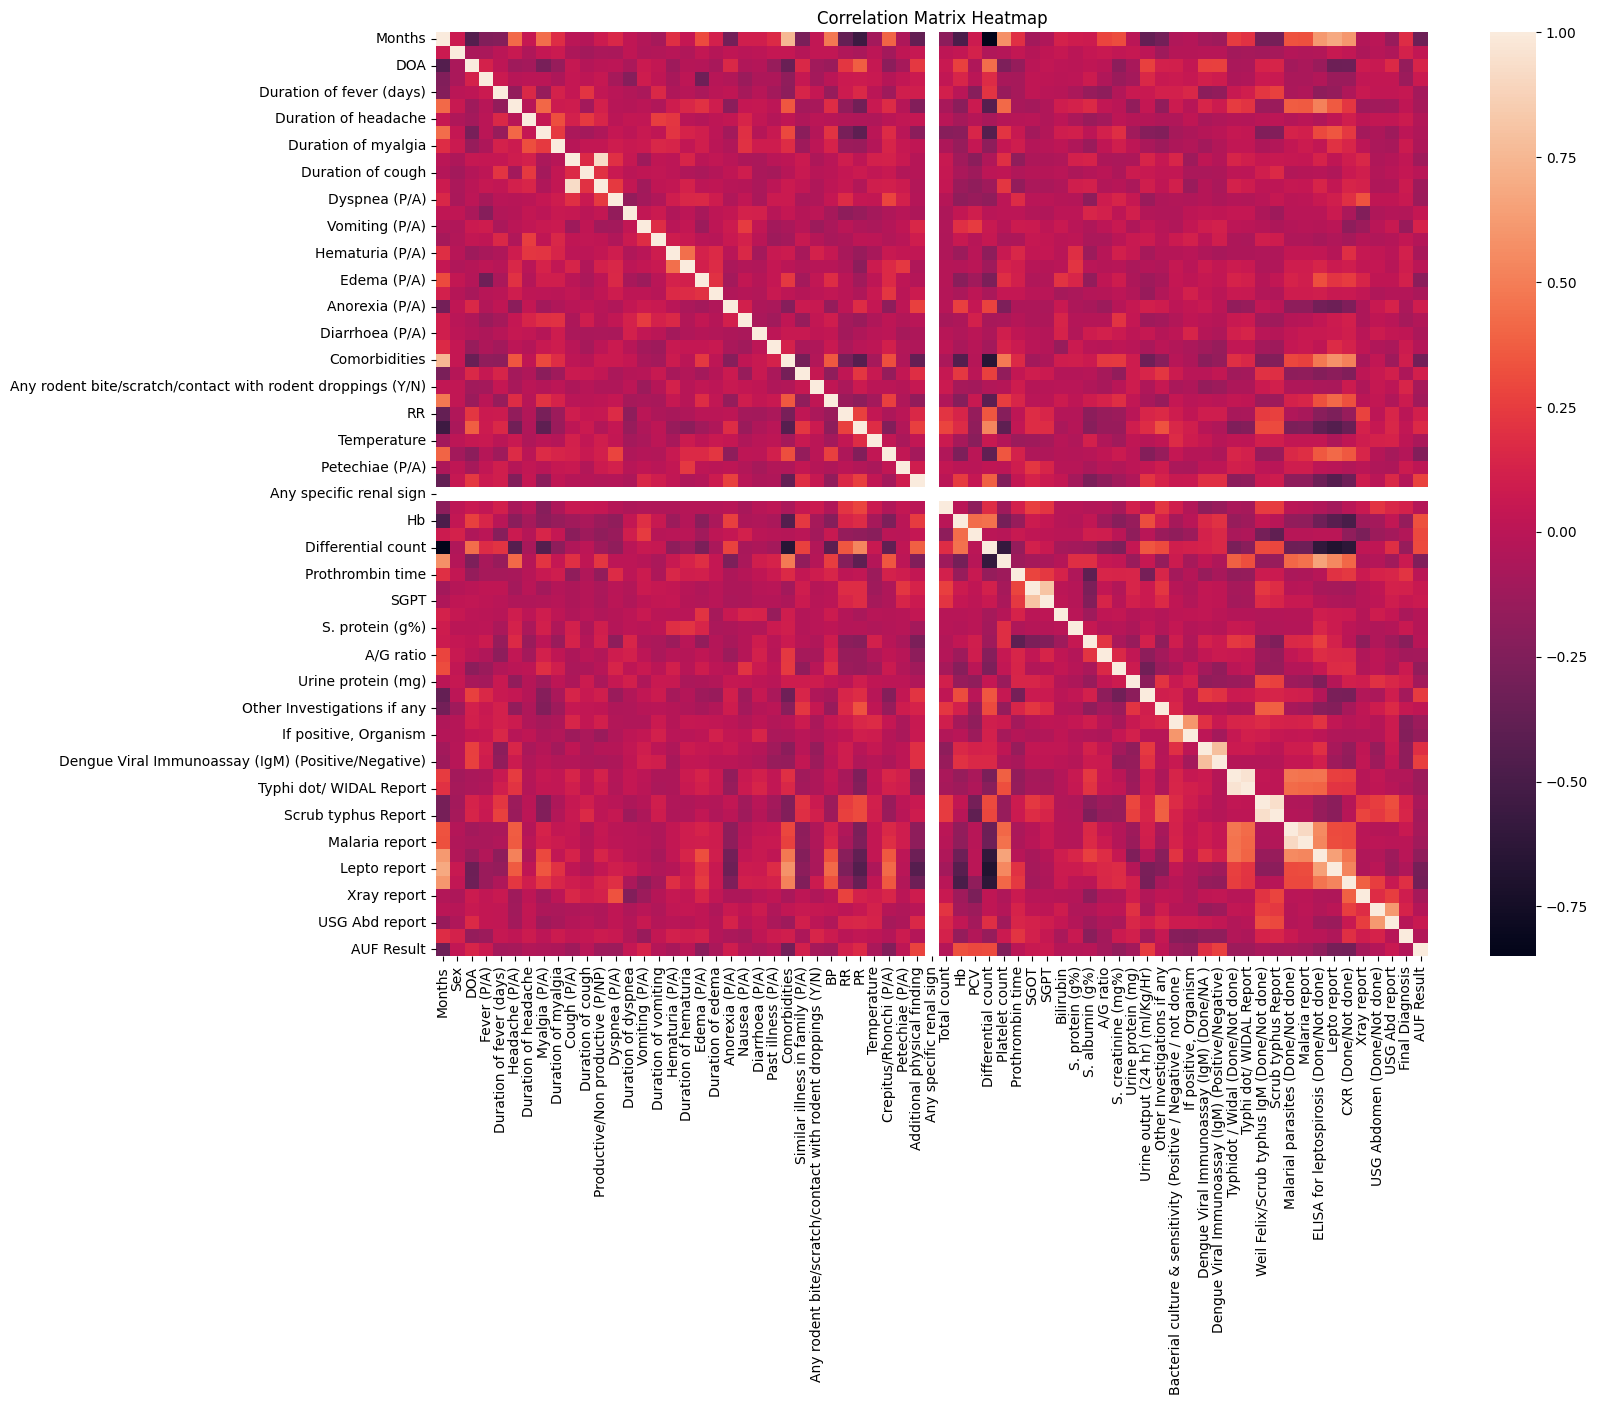

Features to drop: ['Productive/Non productive (P/NP)', 'Comorbidities', 'Differential count', 'SGPT', 'Dengue Viral Immunoassay (IgM) (Positive/Negative)', 'Typhi dot/ WIDAL Report', 'Scrub typhus Report', 'Malaria report']
Remaining features: Index(['Months', 'Sex', 'DOA', 'Fever (P/A)', 'Duration of fever (days)',
       'Headache (P/A)', 'Duration of headache', 'Myalgia (P/A)',
       'Duration of myalgia', 'Cough (P/A)', 'Duration of cough',
       'Dyspnea (P/A)', 'Duration of dyspnea', 'Vomiting (P/A)',
       'Duration of vomiting', 'Hematuria (P/A)', 'Duration of hematuria',
       'Edema (P/A)', 'Duration of edema', 'Anorexia (P/A)', 'Nausea (P/A)',
       'Diarrhoea (P/A)', 'Past illness (P/A)',
       'Similar illness in family (P/A)',
       'Any rodent bite/scratch/contact with rodent droppings (Y/N)', 'BP',
       'RR', 'PR', 'Temperature', 'Crepitus/Rhonchi (P/A)', 'Petechiae (P/A)',
       'Additional physical finding', 'Any specific renal sign', 'Total count',
       '

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# 1. Fill NA values with column means (optional)
#df_filled = df.fillna(df.mean())

# 2. Calculate the correlation matrix
corr_matrix = data.corr()

# 3. Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix)#, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Additional steps to drop highly correlated features

# Create a mask to identify highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold (e.g., 0.9)
threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Drop the features
df_reduced = data.drop(columns=to_drop)

print(f"Features to drop: {to_drop}")
print(f"Remaining features: {df_reduced.columns}")


# Final Data

In [ ]:
len(['Productive/Non productive (P/NP)', 'Typhi dot/ WIDAL Report',
           'Scrub typhus Report', 'Malaria report',
           'Lepto report','Duration of dyspnea',
           'Duration of hematuria','Duration of edema'])

8

In [ ]:
# Duration of dyspnea
# Duration of hematuria
# Duration of edema
# data.drop(['Productive/Non productive (P/NP)', 'Typhi dot/ WIDAL Report',
#            'Scrub typhus Report', 'Malaria report',
#            'Lepto report','Duration of dyspnea',
#            'Duration of hematuria','Duration of edema'],axis=1,inplace=True)

In [ ]:
data.shape

(361, 69)

In [ ]:
data.head()

,Months,Sex,DOA,Fever (P/A),Duration of fever (days),Headache (P/A),Duration of headache,Myalgia (P/A),Duration of myalgia,Cough (P/A),...,Malarial parasites (Done/Not done),Malaria report,ELISA for leptospirosis (Done/Not done),Lepto report,CXR (Done/Not done),Xray report,USG Abdomen (Done/Not done),USG Abd report,Final Diagnosis,AUF Result
0,24,0,190622,1,3.0,0,4.0,0,3.0,0,...,0,0,0,0,0,-1,1,0.0,114,1
1,59,1,210622,1,4.0,0,4.0,0,3.0,0,...,0,0,0,0,1,0,1,5955.0,114,2
2,528,0,0,1,7.0,1,30.0,1,5.0,1,...,0,0,0,0,1,0,1,6227.0,173,1
3,492,1,0,1,4.0,0,4.0,1,4.0,0,...,0,0,0,0,1,0,0,-1,173,1
4,900,1,0,0,5.0,0,4.0,0,3.0,0,...,0,0,0,0,1,0,0,-1,173,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['Months', 'Sex', 'DOA', 'Fever (P/A)', 'Duration of fever (days)',
       'Headache (P/A)', 'Duration of headache', 'Myalgia (P/A)',
       'Duration of myalgia', 'Cough (P/A)', 'Duration of cough',
       'Productive/Non productive (P/NP)', 'Dyspnea (P/A)',
       'Duration of dyspnea', 'Vomiting (P/A)', 'Duration of vomiting',
       'Hematuria (P/A)', 'Duration of hematuria', 'Edema (P/A)',
       'Duration of edema', 'Anorexia (P/A)', 'Nausea (P/A)',
       'Diarrhoea (P/A)', 'Past illness (P/A)', 'Comorbidities',
       'Similar illness in family (P/A)',
       'Any rodent bite/scratch/contact with rodent droppings (Y/N)', 'BP',
       'RR', 'PR', 'Temperature', 'Crepitus/Rhonchi (P/A)', 'Petechiae (P/A)',
       'Additional physical finding', 'Any specific renal sign', 'Total count',
       'Hb', 'PCV', 'Differential count', 'Platelet count', 'Prothrombin time',
       'SGOT', 'SGPT', 'Bilirubin', 'S. protein (g%)', 'S. albumin (g%)',
       'A/G ratio', 'S. creatinine (mg

In [ ]:
X = data.drop('AUF Result', axis=1).values
y = data['AUF Result'].values

In [ ]:
data['AUF Result'].value_counts()

AUF Result
1    207
2    109
0     45
Name: count, dtype: int64

In [ ]:
#y=y.apply(yt)

In [ ]:
#data.to_csv("Encoded_data.csv")

# Baseline


In [ ]:
#!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
# Initialize the setup
clf = setup(data, target='AUF Result', session_id=123,train_size=0.8)

# Compare models and select the best one
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,AUF Result
2,Target type,Multiclass
3,Original data shape,"(361, 69)"
4,Transformed data shape,"(361, 69)"
5,Transformed train set shape,"(288, 69)"
6,Transformed test set shape,"(73, 69)"
7,Numeric features,67
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7534,0.8199,0.7534,0.7085,0.7108,0.5054,0.5378,0.3980
rf,Random Forest Classifier,0.7532,0.8281,0.7532,0.6979,0.7075,0.5103,0.5386,0.4320
lightgbm,Light Gradient Boosting Machine,0.7084,0.7978,0.7084,0.6707,0.6827,0.4514,0.4609,0.6060
xgboost,Extreme Gradient Boosting,0.7081,0.7846,0.7081,0.6711,0.6829,0.4531,0.4632,0.2580
gbc,Gradient Boosting Classifier,0.7047,0.0000,0.7047,0.6860,0.6825,0.4502,0.4597,0.6290
lr,Logistic Regression,0.6881,0.0000,0.6881,0.6120,0.6407,0.3940,0.4165,2.0470
qda,Quadratic Discriminant Analysis,0.6874,0.0000,0.6874,0.6340,0.6399,0.3770,0.4065,0.1080
ridge,Ridge Classifier,0.6600,0.0000,0.6600,0.6410,0.6441,0.3757,0.3814,0.1070
ada,Ada Boost Classifier,0.6461,0.0000,0.6461,0.6353,0.6288,0.3454,0.3553,0.1890
lda,Linear Discriminant Analysis,0.6289,0.0000,0.6289,0.6198,0.6191,0.3256,0.3294,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]